### CLASSIFIER TRAINING USING CNN

Import Libraries

In [36]:
import pandas as pd
import os
import glob
import re
import numpy as np 
from PIL import Image
import cv2
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Training File locations

In [37]:
train_imgs = "/home/hevish/Desktop/Classifier/Traffic-Sign-Classifier-master/transferringWed/image_t/train2/"
train_labels = "/home/hevish/Desktop/Classifier/Traffic-Sign-Classifier-master/transferringWed/labels_t/train2.csv"

In [38]:
# Function to sort training images in ascending order w.r.t the extracted order
def extract_number(path:str):
    number = re.search(r"/(\d{1,10})_", path)
    return int(number.group(1))

# Extracting training files
train_files = glob.glob(train_imgs + "*.png")
train_files.sort(key=extract_number)
train_files

['/home/hevish/Desktop/Classifier/Traffic-Sign-Classifier-master/transferringWed/image_t/train2/0_00000_00016.png',
 '/home/hevish/Desktop/Classifier/Traffic-Sign-Classifier-master/transferringWed/image_t/train2/30_00006_00002.png',
 '/home/hevish/Desktop/Classifier/Traffic-Sign-Classifier-master/transferringWed/image_t/train2/60_00005_00017.png',
 '/home/hevish/Desktop/Classifier/Traffic-Sign-Classifier-master/transferringWed/image_t/train2/90_00000_00015.png',
 '/home/hevish/Desktop/Classifier/Traffic-Sign-Classifier-master/transferringWed/image_t/train2/120_00001_00006.png',
 '/home/hevish/Desktop/Classifier/Traffic-Sign-Classifier-master/transferringWed/image_t/train2/150_00003_00004.png',
 '/home/hevish/Desktop/Classifier/Traffic-Sign-Classifier-master/transferringWed/image_t/train2/180_00005_00011.png',
 '/home/hevish/Desktop/Classifier/Traffic-Sign-Classifier-master/transferringWed/image_t/train2/210_00003_00007.png',
 '/home/hevish/Desktop/Classifier/Traffic-Sign-Classifier-mas

### Create Training Dataframe for easy storage and manipulation

In [39]:
df_train = pd.DataFrame(train_files, columns=["path"])

In [40]:
df_train["FileName"] = df_train['path'].map(os.path.basename)

In [41]:
df_train['Labels'] = pd.read_csv(train_labels, header=None)

In [42]:
df_train

,path,FileName,Labels
0,/home/hevish/Desktop/Classifier/Traffic-Sign-C...,0_00000_00016.png,0
1,/home/hevish/Desktop/Classifier/Traffic-Sign-C...,30_00006_00002.png,0
2,/home/hevish/Desktop/Classifier/Traffic-Sign-C...,60_00005_00017.png,0
3,/home/hevish/Desktop/Classifier/Traffic-Sign-C...,90_00000_00015.png,0
4,/home/hevish/Desktop/Classifier/Traffic-Sign-C...,120_00001_00006.png,0
...,...,...,...
1304,/home/hevish/Desktop/Classifier/Traffic-Sign-C...,39120_00002_00002.png,42
1305,/home/hevish/Desktop/Classifier/Traffic-Sign-C...,39150_00000_00005.png,42
1306,/home/hevish/Desktop/Classifier/Traffic-Sign-C...,39180_00002_00011.png,42
1307,/home/hevish/Desktop/Classifier/Traffic-Sign-C...,39210_00003_00028.png,42


Test file locations

In [45]:
test_imgs = "/home/hevish/Desktop/Classifier/Traffic-Sign-Classifier-master/transferringWed/image_t/test/"
test_labels = "/home/hevish/Desktop/Classifier/Traffic-Sign-Classifier-master/transferringWed/labels_t/test.csv"

In [51]:
# Extracting and sorting test/validation files 
test_files = glob.glob(test_imgs + "*.png")
test_files.sort()
test_files

['/home/hevish/Desktop/Classifier/Traffic-Sign-Classifier-master/transferringWed/image_t/test/sign_00000.png',
 '/home/hevish/Desktop/Classifier/Traffic-Sign-Classifier-master/transferringWed/image_t/test/sign_00001.png',
 '/home/hevish/Desktop/Classifier/Traffic-Sign-Classifier-master/transferringWed/image_t/test/sign_00002.png',
 '/home/hevish/Desktop/Classifier/Traffic-Sign-Classifier-master/transferringWed/image_t/test/sign_00003.png',
 '/home/hevish/Desktop/Classifier/Traffic-Sign-Classifier-master/transferringWed/image_t/test/sign_00004.png',
 '/home/hevish/Desktop/Classifier/Traffic-Sign-Classifier-master/transferringWed/image_t/test/sign_00005.png',
 '/home/hevish/Desktop/Classifier/Traffic-Sign-Classifier-master/transferringWed/image_t/test/sign_00006.png',
 '/home/hevish/Desktop/Classifier/Traffic-Sign-Classifier-master/transferringWed/image_t/test/sign_00007.png',
 '/home/hevish/Desktop/Classifier/Traffic-Sign-Classifier-master/transferringWed/image_t/test/sign_00008.png',
 

Create Testing Dataframe for easy storage and manipulation

In [52]:
df_test = pd.DataFrame(test_files, columns=["path"])

In [53]:
df_test["FileName"] = df_test['path'].map(os.path.basename)

In [56]:
df_test['Labels'] = pd.read_csv(test_labels, header=None)

Merge into 1 big dataframe to get all images and split accordingly

In [59]:
df = df_train.append(df_test, ignore_index=True).copy()

Training Set: 12000 Validation Set: 1939

In [74]:
train_df = df[0:12000].copy()
train_df

,path,FileName,Labels
0,/home/hevish/Desktop/Classifier/Traffic-Sign-C...,0_00000_00016.png,0
1,/home/hevish/Desktop/Classifier/Traffic-Sign-C...,30_00006_00002.png,0
2,/home/hevish/Desktop/Classifier/Traffic-Sign-C...,60_00005_00017.png,0
3,/home/hevish/Desktop/Classifier/Traffic-Sign-C...,90_00000_00015.png,0
4,/home/hevish/Desktop/Classifier/Traffic-Sign-C...,120_00001_00006.png,0
...,...,...,...
11995,/home/hevish/Desktop/Classifier/Traffic-Sign-C...,sign_10686.png,25
11996,/home/hevish/Desktop/Classifier/Traffic-Sign-C...,sign_10687.png,38
11997,/home/hevish/Desktop/Classifier/Traffic-Sign-C...,sign_10688.png,5
11998,/home/hevish/Desktop/Classifier/Traffic-Sign-C...,sign_10689.png,12


In [75]:
test_df = df[12000:].copy()
test_df

,path,FileName,Labels
12000,/home/hevish/Desktop/Classifier/Traffic-Sign-C...,sign_10691.png,20
12001,/home/hevish/Desktop/Classifier/Traffic-Sign-C...,sign_10692.png,18
12002,/home/hevish/Desktop/Classifier/Traffic-Sign-C...,sign_10693.png,8
12003,/home/hevish/Desktop/Classifier/Traffic-Sign-C...,sign_10694.png,12
12004,/home/hevish/Desktop/Classifier/Traffic-Sign-C...,sign_10695.png,18
...,...,...,...
13934,/home/hevish/Desktop/Classifier/Traffic-Sign-C...,sign_12625.png,12
13935,/home/hevish/Desktop/Classifier/Traffic-Sign-C...,sign_12626.png,33
13936,/home/hevish/Desktop/Classifier/Traffic-Sign-C...,sign_12627.png,6
13937,/home/hevish/Desktop/Classifier/Traffic-Sign-C...,sign_12628.png,7


In [106]:
# Function to extract images and their corresponding labels 
def load_data(data_frame):
    x = []
    for path in data_frame.path.values:
        img = Image.open(path)
        x.append(np.asarray(img.copy()))
        img.close()
    x = np.array(x)
    
    y = data_frame.Labels.values
    return x, y

In [108]:
test_images, test_labels = load_data(test_df) #Validation Set
train_images, train_labels = load_data(train_df) #Train Set

In [109]:
test_images.shape #To check

(1939, 32, 32, 3)

In [110]:
train_images.shape #To check

(12000,)

In [111]:
# Normalizing pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels
train_images

array([array([[[0.74117647, 0.5372549 , 0.51372549],
        [0.67843137, 0.30196078, 0.28627451],
        [0.75686275, 0.20784314, 0.18823529],
        ...,
        [0.58823529, 0.17647059, 0.0627451 ],
        [0.66666667, 0.31372549, 0.26666667],
        [0.6627451 , 0.41176471, 0.43137255]],

       [[0.78431373, 0.48235294, 0.47843137],
        [0.6745098 , 0.25098039, 0.19607843],
        [0.7372549 , 0.19607843, 0.15294118],
        ...,
        [0.60784314, 0.31372549, 0.16078431],
        [0.50196078, 0.25098039, 0.18039216],
        [0.59607843, 0.43137255, 0.44313725]],

       [[0.76862745, 0.36470588, 0.3372549 ],
        [0.6745098 , 0.20392157, 0.14901961],
        [0.7372549 , 0.2       , 0.15686275],
        ...,
        [0.62745098, 0.45490196, 0.40392157],
        [0.60392157, 0.45098039, 0.41960784],
        [0.53333333, 0.45098039, 0.43921569]],

       ...,

       [[0.54117647, 0.51372549, 0.54509804],
        [0.5254902 , 0.50588235, 0.53333333],
        [0.5137

In [112]:
# Resizing image to 32x32
#all_trains are training data set resized to 32x32 images
all_trains = [] 
for idx, train_image in enumerate(train_images):
    train_image = cv2.resize(train_image, (32,32), interpolation = cv2.INTER_LINEAR)
    all_trains.append(train_image)
all_trains = np.asarray(all_trains)
print(all_trains.shape)

(12000, 32, 32, 3)


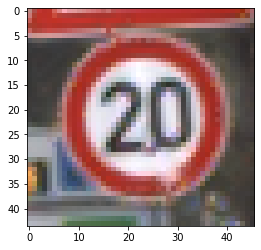

In [115]:
plt.imshow(train_images[0], cmap=plt.cm.binary) #To check

In [116]:
test_labels.shape

(1939,)

In [118]:
test_images.shape

(1939, 32, 32, 3)

In [119]:
train_labels.shape

(12000,)

In [121]:
all_trains.shape

(12000, 32, 32, 3)

In [122]:
import numpy
import sys

numpy.set_printoptions(threshold=sys.maxsize)
all_trains[28].shape

(32, 32, 3)

Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image.

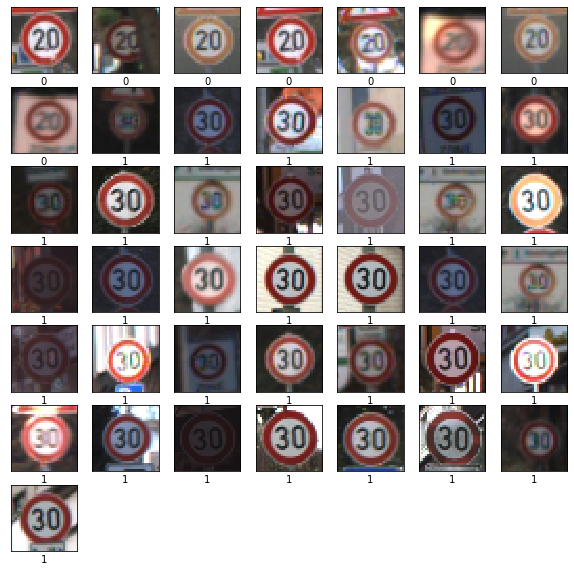

In [123]:
# 43 Classes
class_names = ['0','1', '2', '3', '4', '5',
               '6', '7', '8', '9', '10','11', '12', '13', '14', '15',
               '16', '17', '18', '19', '20','21', '22', '23', '24', '25',
               '26', '27', '28', '29', '30','31', '32', '33', '34', '35',
               '36', '37', '38', '39', '40','41','42']


plt.figure(figsize=(10,10))
i=0
for i in range(43):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(all_trains[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[int(train_labels[i])])
plt.show()

### Create the convolutional base

In [124]:
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32 , 32, 3)))
#model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

Instructions for updating:
Colocations handled automatically by placer.


In [125]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       73856     
Total params: 97,440
Trainable params: 97,440
Non-trainable params: 0
_________________________________________________________________


### Add Dense layers on top

In [126]:
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(43, activation='softmax'))

In [127]:
model.summary()
#Here's the complete architecture of our model.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
flatten (Flatten)            (None, 73728)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              75498496  
_________________________________________________________________
dense_1 (Dense)              (None, 256)               262400    
__________

### Compile and train the model 

In [129]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(all_trains, train_labels,batch_size = 10, validation_split=0.25, epochs=15, 
                    validation_data=(test_images, test_labels))

Train on 12000 samples, validate on 1939 samples
Epoch 1/15
12000/12000 [==============================] - 1303s 109ms/sample - loss: 0.1429 - acc: 0.9601 - val_loss: 0.1198 - val_acc: 0.9732
Epoch 2/15
12000/12000 [==============================] - 1376s 115ms/sample - loss: 0.0901 - acc: 0.9758 - val_loss: 0.1001 - val_acc: 0.9783
Epoch 3/15
12000/12000 [==============================] - 1329s 111ms/sample - loss: 0.0581 - acc: 0.9846 - val_loss: 0.1882 - val_acc: 0.9639
Epoch 4/15
12000/12000 [==============================] - 1272s 106ms/sample - loss: 0.0523 - acc: 0.9872 - val_loss: 0.0825 - val_acc: 0.9809
Epoch 5/15
12000/12000 [==============================] - 1261s 105ms/sample - loss: 0.0614 - acc: 0.9855 - val_loss: 0.1693 - val_acc: 0.9675
Epoch 6/15
12000/12000 [==============================] - 1271s 106ms/sample - loss: 0.0362 - acc: 0.9915 - val_loss: 0.4864 - val_acc: 0.9103
Epoch 7/15
12000/12000 [==============================] - 1273s 106ms/sample - loss: 0.0541 -

### Evaluate the model

 - 15s - loss: 0.1513 - acc: 0.9825


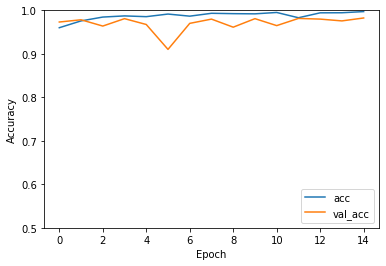

In [130]:
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label = 'val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

### Save the model

In [131]:
# MODEL_NAME = 'classifier_model_new12000.h5'
model.save(MODEL_NAME)

# Open the model from a different notebook (fromLoadedModel) for testing on our collected data